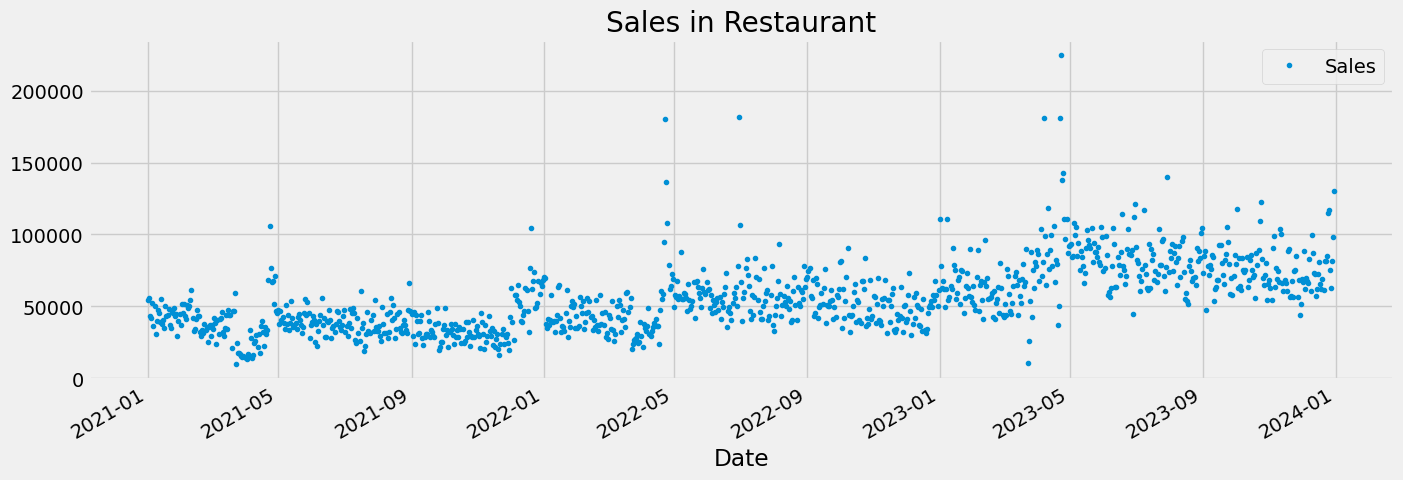

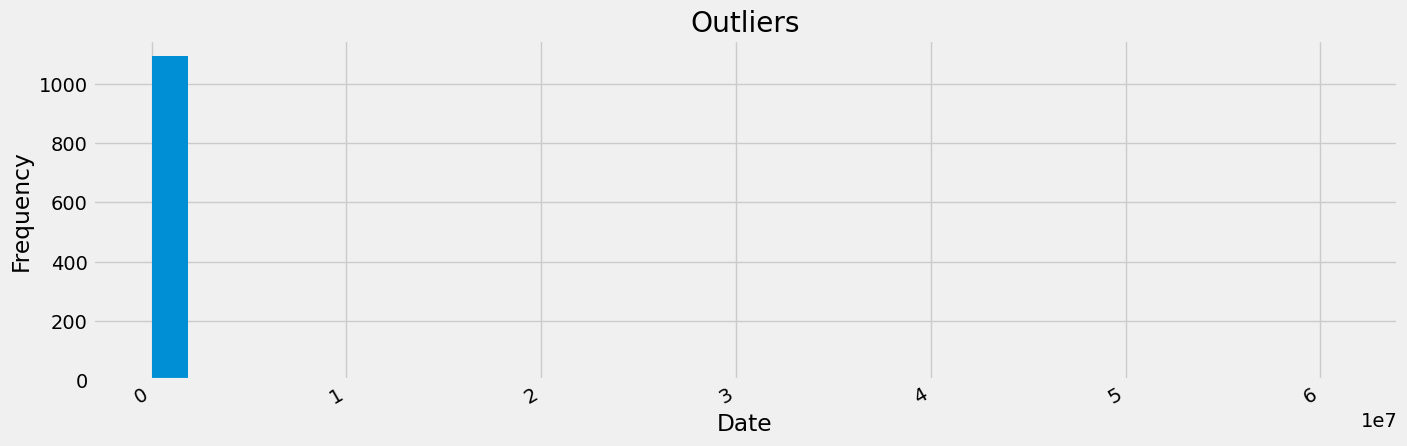

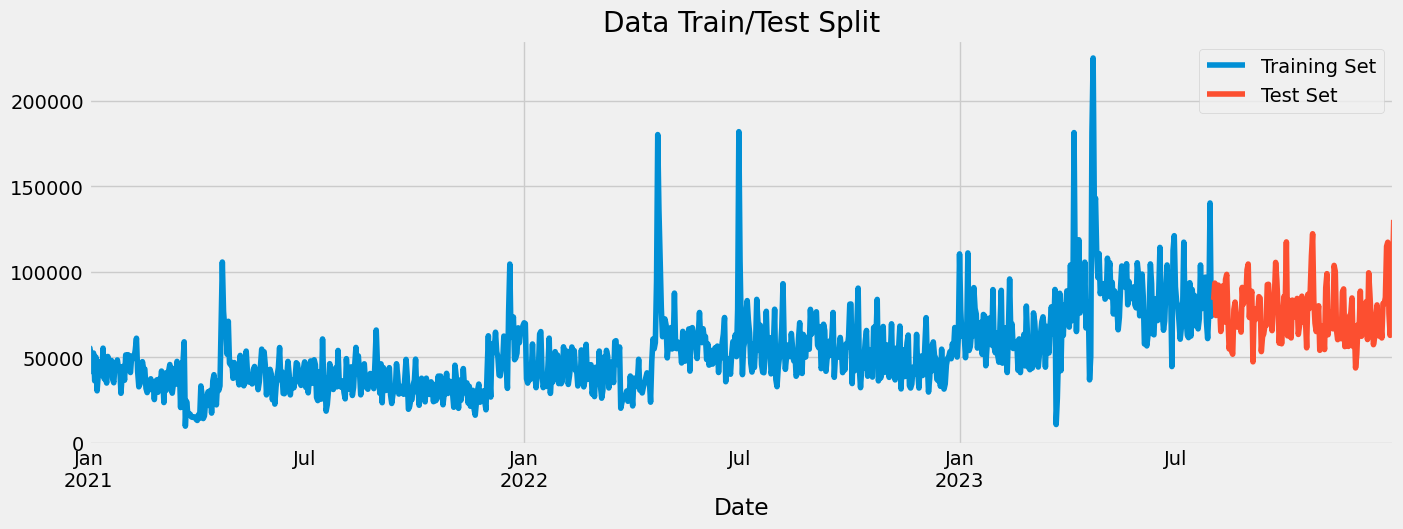

[0]	validation_0-rmse:49301.31749	validation_1-rmse:88446.88204
[100]	validation_0-rmse:31995.02992	validation_1-rmse:66539.14783
[200]	validation_0-rmse:22276.74338	validation_1-rmse:53765.29146


C:\Users\Carolin\miniconda3\envs\myenv\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:02:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:16999.96109	validation_1-rmse:47146.01024
[400]	validation_0-rmse:14139.69453	validation_1-rmse:44020.74120
[500]	validation_0-rmse:12655.37934	validation_1-rmse:41755.86946
[600]	validation_0-rmse:11818.15017	validation_1-rmse:40102.77155
[700]	validation_0-rmse:11304.67017	validation_1-rmse:39051.90091
[800]	validation_0-rmse:10962.36402	validation_1-rmse:38631.75373
[900]	validation_0-rmse:10686.58888	validation_1-rmse:38388.35602
[999]	validation_0-rmse:10427.10312	validation_1-rmse:38034.19658
[0]	validation_0-rmse:54878.56670	validation_1-rmse:81287.23499
[100]	validation_0-rmse:35616.89372	validation_1-rmse:57448.11083
[200]	validation_0-rmse:24772.22875	validation_1-rmse:41461.76069


C:\Users\Carolin\miniconda3\envs\myenv\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:02:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:18973.89173	validation_1-rmse:30263.99326
[400]	validation_0-rmse:15942.33298	validation_1-rmse:24013.88569
[500]	validation_0-rmse:14258.58390	validation_1-rmse:21304.39421
[600]	validation_0-rmse:13327.58113	validation_1-rmse:19807.80908
[700]	validation_0-rmse:12788.39406	validation_1-rmse:18907.22877
[800]	validation_0-rmse:12436.54445	validation_1-rmse:18250.39823
[900]	validation_0-rmse:12072.17451	validation_1-rmse:17929.18128
[999]	validation_0-rmse:11785.50453	validation_1-rmse:17581.76592
[0]	validation_0-rmse:58027.92407	validation_1-rmse:6091925.97067
[100]	validation_0-rmse:37428.57289	validation_1-rmse:6088256.05897
[200]	validation_0-rmse:25842.38762	validation_1-rmse:6085949.38706


C:\Users\Carolin\miniconda3\envs\myenv\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:02:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:19789.67976	validation_1-rmse:6084441.32802
[400]	validation_0-rmse:16801.27176	validation_1-rmse:6083786.87572
[500]	validation_0-rmse:15142.93880	validation_1-rmse:6083506.18264
[600]	validation_0-rmse:14158.64071	validation_1-rmse:6083367.29702
[700]	validation_0-rmse:13567.86927	validation_1-rmse:6083267.09257
[800]	validation_0-rmse:13176.24117	validation_1-rmse:6083208.94545
[900]	validation_0-rmse:12798.82541	validation_1-rmse:6083180.48627
[999]	validation_0-rmse:12462.80463	validation_1-rmse:6083153.36493


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
df=pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv")
df=df.set_index('Date')
df.index=pd.to_datetime(df.index)
df.head()
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Sales in Restaurant')
plt.show()
df['Sales'].plot(kind='hist', bins=int(np.sqrt(len(df['Sales']))))
df.query('Sales < 0')['Sales'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')
train = df.loc[df.index < '2023-08-02']
test = df.loc[df.index >= '2023-08-02']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
#ax.axvline('2023-10-25', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)
df
tss = TimeSeriesSplit(n_splits=3, test_size=100, gap=10)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year']
    TARGET = 'Sales'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.005)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

def predict_sales(df, start_date, end_date):
    """
    Predict future sales using XGBoost model and display plots.
    """
    df = df.copy()
    df.index = pd.to_datetime(df.index)
    df = create_features(df)
    
    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
    TARGET = 'Sales'
    
    X_train = df[FEATURES]
    y_train = df[TARGET]
    
    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           objective='reg:squarederror',  # Change objective to reg:squarederror
                           max_depth=3,
                           learning_rate=0.01)
    
    # Split the data into training and validation sets
    train_size = int(len(df) * 0.8)  # 80% of the data for training
    X_train, X_val = X_train[:train_size], X_train[train_size:]
    y_train, y_val = y_train[:train_size], y_train[train_size:]
    
    reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=False)

    future_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    future_features = create_features(pd.DataFrame(index=future_dates))[FEATURES]  # Only select required features
    
    future_sales = reg.predict(future_features)
    
    # Plotting predicted sales
    plt.figure(figsize=(15, 5))
    plt.plot(df.index, df['Sales'], label='Actual Sales', color='blue')
    plt.plot(future_dates, future_sales, label='Predicted Sales', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title('Actual vs Predicted Sales')
    plt.legend()
    plt.show()
    
    # Displaying predicted sales
    predicted_sales_df = pd.DataFrame({'Date': future_dates, 'Predicted Sales': future_sales})
    print(predicted_sales_df)

Enter start date (YYYY-MM-DD):  2024-06-01
Enter end date (YYYY-MM-DD):  2024-09-01


         Date  Predicted_Sales
0  2024-06-01     60637.925781
1  2024-06-02     56907.988281
2  2024-06-03     52749.765625
3  2024-06-04     55057.363281
4  2024-06-05     57038.726562
..        ...              ...
88 2024-08-28     54629.929688
89 2024-08-29     58851.613281
90 2024-08-30     62051.152344
91 2024-08-31     58796.406250
92 2024-09-01     60637.925781

[93 rows x 2 columns]


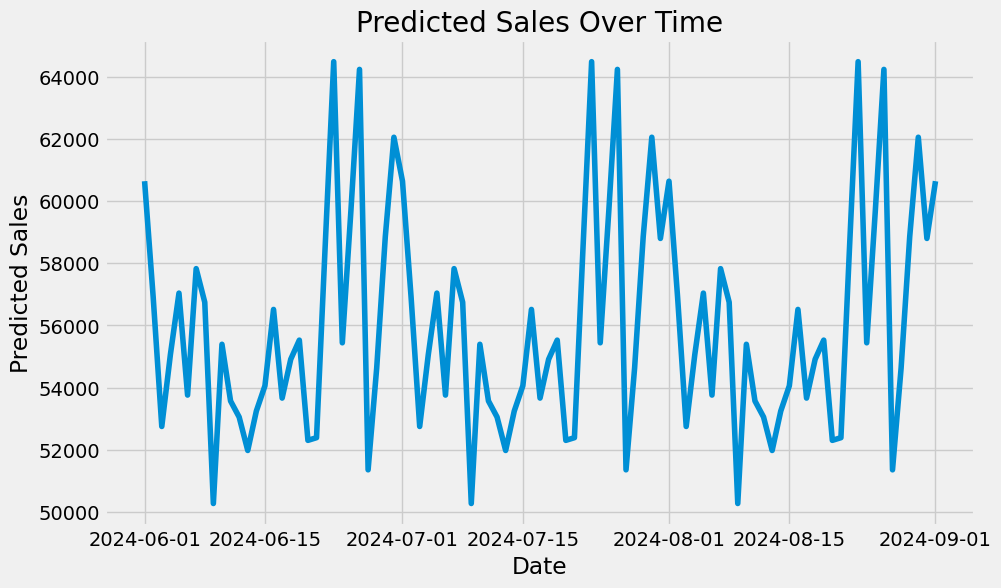

In [15]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data from CSV file or your data source
csv_file_path = "C:/Users/Carolin/Desktop/3yeardata.csv"
df = pd.read_csv(csv_file_path)

# Feature engineering: Extract day as a feature
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df['Day'] = df['Date'].dt.day  # Extract day of the month

# Split the dataset into features (X) and target variable (y)
X = df[['Day']]
y = df['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'max_depth': 5,
    'learning_rate': 0.05,
    'n_estimators': 200
}

model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)

# Specify start and end date (user input)
start_date_input = input("Enter start date (YYYY-MM-DD): ")
end_date_input = input("Enter end date (YYYY-MM-DD): ")

start_date = pd.to_datetime(start_date_input)
end_date = pd.to_datetime(end_date_input)

# Initialize a list to store demand data
demand_data = []

# Loop through the range of dates
current_date = start_date
while current_date <= end_date:
    new_features = pd.DataFrame({
        'Day': [current_date.day]
    })

    # Make predictions on the new features
    new_features['Predicted_Sales'] = model.predict(new_features[['Day']])
    
    # Append the predicted sales to the demand_data list
    demand_data.append({
        'Date': current_date,
        'Predicted_Sales': new_features['Predicted_Sales'].iloc[0]
    })

    # Move to the next day
    current_date += pd.Timedelta(days=1)

# Convert demand_data to a DataFrame
predicted_sales_df = pd.DataFrame(demand_data)

# Print the predicted sales
print(predicted_sales_df)

# Plot the predicted sales
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(predicted_sales_df['Date'], predicted_sales_df['Predicted_Sales'])
plt.title('Predicted Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Set style and load data
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
df = pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv")
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

# Function to create time series features from date index
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

# Create features
df = create_features(df)
FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'Sales'

# Define TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=3, test_size=100, gap=10)
df = df.sort_index()

# Initialize lists to hold metrics for each fold
all_mae = []
all_mse = []
all_rmse = []
all_mape = []
all_r_squared = []

# Cross-validation using TimeSeriesSplit
for train_idx, val_idx in tss.split(df):
    # Split data into train and test sets
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    # Ensure features are created for train and test sets
    train = create_features(train)
    test = create_features(test)

    # Split into features and target variable
    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    # Create and train the XGBoost model
    reg = xgb.XGBRegressor(
        base_score=0.5, booster='gbtree', n_estimators=1000,
        early_stopping_rounds=50, objective='reg:squarederror',
        max_depth=3, learning_rate=0.01, verbosity=0,
        eval_metric='rmse'
    )

    # Fit the model with training data and test data for evaluation
    reg.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False
    )

    # Make predictions on the test set
    y_pred = reg.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r_squared = r2_score(y_test, y_pred)

    # Store metrics for each fold
    all_mae.append(mae)
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_mape.append(mape)
    all_r_squared.append(r_squared)

# Calculate mean metrics across all folds
mean_mae = np.mean(all_mae)
mean_mse = np.mean(all_mse)
mean_rmse = np.mean(all_rmse)
mean_mape = np.mean(all_mape)
mean_r_squared = np.mean(all_r_squared)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mean_mae:.2f}")
print(f"Mean Squared Error (MSE): {mean_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {mean_rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_mape:.2f}%")
print(f"R-squared (R²): {mean_r_squared:.2f}")


Mean Absolute Error (MAE): 220423.80
Mean Squared Error (MSE): 12335439479914.22
Root Mean Squared Error (RMSE): 2045779.07
Mean Absolute Percentage Error (MAPE): 21.71%
R-squared (R²): -0.26


Mean RMSE across folds: 2045779.07


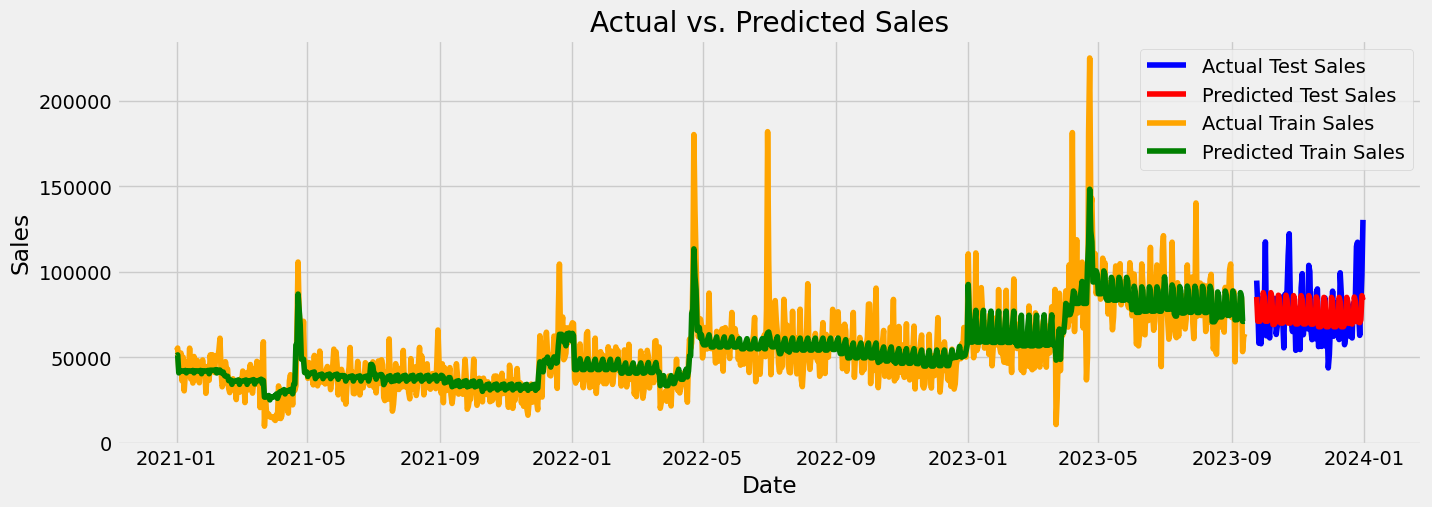

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

# Setting up plot styles
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Loading data
df = pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv")
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

# Function to create features from datetime index
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

# Create features
df = create_features(df)

# Define features and target variable
FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'Sales'

# Set up TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=3, test_size=100, gap=10)
df = df.sort_index()

# Initialize lists to hold metrics for each fold
preds = []
scores = []
train_preds = []
test_preds = []

# Cross-validation using TimeSeriesSplit
for train_idx, val_idx in tss.split(df):
    # Split data into training and test sets
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    # Make sure features are created for train and test data
    train = create_features(train)
    test = create_features(test)

    # Define training and test features and target
    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    # Create and fit the XGBoost model
    reg = xgb.XGBRegressor(
        base_score=0.5, booster='gbtree', n_estimators=1000,
        early_stopping_rounds=50, objective='reg:squarederror',
        max_depth=3, learning_rate=0.01, verbosity=0,
        eval_metric='rmse'
    )

    # Fit the model with training data and test data for evaluation
    reg.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False
    )

    # Make predictions on the test set and training set
    y_pred_test = reg.predict(X_test)
    y_pred_train = reg.predict(X_train)

    # Append predictions to lists
    preds.append(y_pred_test)
    train_preds.append(y_pred_train)

    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    scores.append(rmse)

# Calculate mean RMSE across all folds
mean_rmse = np.mean(scores)

# Print mean RMSE
print(f"Mean RMSE across folds: {mean_rmse:.2f}")

# Combine predicted values for test and training sets for the last fold
test_predictions = preds[-1]
train_predictions = train_preds[-1]

# Plot actual vs. predicted values for test and training sets
plt.figure(figsize=(15, 5))
plt.plot(df.index[val_idx], test['Sales'], label='Actual Test Sales', color='blue')
plt.plot(df.index[val_idx], test_predictions, label='Predicted Test Sales', color='red')
plt.plot(df.index[train_idx], train['Sales'], label='Actual Train Sales', color='orange')
plt.plot(df.index[train_idx], train_predictions, label='Predicted Train Sales', color='green')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
